#### Detection of speech anomalies
The main objective of this project is to predict that whether the patient has speech anomaly or not and to compare the results obtained by different machine learning techniques

## Data set information
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

## Attribute information
Matrix column entries (attributes):
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation



## What is Parkinsons disease?
Parkinson’s disease is a progressive disorder of the central nervous system affecting movement and inducing tremors and stiffness. It has 5 stages to it and affects more than 1 million individuals every year in India. This is chronic and has no cure yet. It is a neurodegenerative disorder affecting dopamine-producing neurons in the brain.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [151]:
df_new=pd.read_csv("parkinsons.csv")

In [152]:
df_new.shape

(195, 24)

In [153]:
df_new['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [154]:
df_new.rename(columns = { 'MDVP:Fo(Hz)': 'Fo(Hz)','MDVP:Fhi(Hz)': 'Fhi(Hz)','MDVP:Flo(Hz)': 'Flo(Hz)', 'MDVP:Jitter(%)':'Jitter(%)', 'MDVP:Jitter(Abs)':'Jitter(Abs)', 'MDVP:RAP':'RAP', 'MDVP:PPQ':'PPQ','MDVP:Shimmer':'Shimmer', 'MDVP:Shimmer(dB)':'Shimmer(dB)', 'MDVP:APQ':'APQ'}, inplace = True)

In [155]:
df_new.columns

Index(['name', 'Fo(Hz)', 'Fhi(Hz)', 'Flo(Hz)', 'Jitter(%)', 'Jitter(Abs)',
       'RAP', 'PPQ', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## Data reading and data cleaning

In [156]:
df_new.head()


,name,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [157]:
df_new = pd.get_dummies(df_new)
df_new.head()

,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,Shimmer,Shimmer(dB),...,name_phon_R01_S49_3,name_phon_R01_S49_4,name_phon_R01_S49_5,name_phon_R01_S49_6,name_phon_R01_S50_1,name_phon_R01_S50_2,name_phon_R01_S50_3,name_phon_R01_S50_4,name_phon_R01_S50_5,name_phon_R01_S50_6
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0,0,0,0,0,0,0,0,0,0
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0,0,0,0,0,0,0,0,0,0
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0,0,0,0,0,0,0,0,0,0
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0,0,0,0,0,0,0,0,0,0
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df_new.describe()

,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,Shimmer,Shimmer(dB),...,name_phon_R01_S49_3,name_phon_R01_S49_4,name_phon_R01_S49_5,name_phon_R01_S49_6,name_phon_R01_S50_1,name_phon_R01_S50_2,name_phon_R01_S50_3,name_phon_R01_S50_4,name_phon_R01_S50_5,name_phon_R01_S50_6
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128,0.005128
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.071611,0.071611,0.071611,0.071611,0.071611,0.071611,0.071611,0.071611,0.071611,0.071611
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
df_new.dtypes

Fo(Hz)                 float64
Fhi(Hz)                float64
Flo(Hz)                float64
Jitter(%)              float64
Jitter(Abs)            float64
                        ...   
name_phon_R01_S50_2      uint8
name_phon_R01_S50_3      uint8
name_phon_R01_S50_4      uint8
name_phon_R01_S50_5      uint8
name_phon_R01_S50_6      uint8
Length: 218, dtype: object

# K-nearest neighbor classification

## Preprocessing and normalization

In [160]:
# Preprocessing
x = df_new.drop(['status'], axis = 1)
y = df_new['status']

In [161]:
# Normalization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

## Training and testing the data sets

In [162]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size = 0.2,random_state=4 , stratify = y)

## Building a model

In [163]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((156, 217), (39, 217), (156,), (39,))

In [164]:
from sklearn.neighbors import KNeighborsClassifier
# Train the model
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [165]:
# Predict the model
y_pred = neigh.predict(x_test)
y_pred[0:10]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [166]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.9423076923076923
Test set Accuracy:  0.8974358974358975


In [167]:
from sklearn.metrics import f1_score
score = f1_score(y_pred, y_test)
print('Test F1 Score    ', score )

Test F1 Score     0.9333333333333333


In [168]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.9 , 0.85, 0.9 , 0.9 , 0.9 , 0.92, 0.9 , 0.87, 0.85])

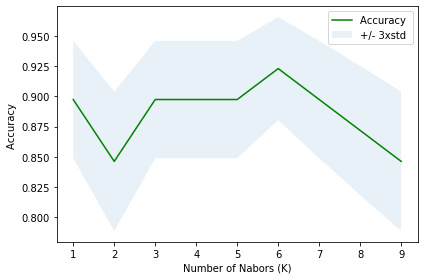

In [169]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [170]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9230769230769231 with k= 6


In [171]:
# Train the model for k = 6
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [172]:
# Predict the model
y_pred = neigh.predict(x_test)
y_pred[0:20]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [173]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.9358974358974359
Test set Accuracy:  0.9230769230769231


In [174]:
from sklearn.metrics import f1_score
score = f1_score(y_pred, y_test)
print('Test F1 Score    ', score )

Test F1 Score     0.9491525423728815


## Data visualization

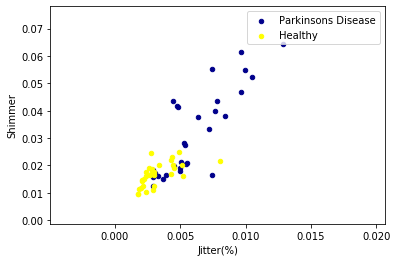

In [177]:
ax = df_new[df_new['status'] == 1][0:30].plot(kind='scatter', x='Jitter(%)', y='Shimmer', color='DarkBlue', label='Parkinsons Disease');
df_new[df_new['status'] == 0][0:30].plot(kind='scatter', x='Jitter(%)', y='Shimmer', color='Yellow', label='Healthy', ax=ax);
plt.show()

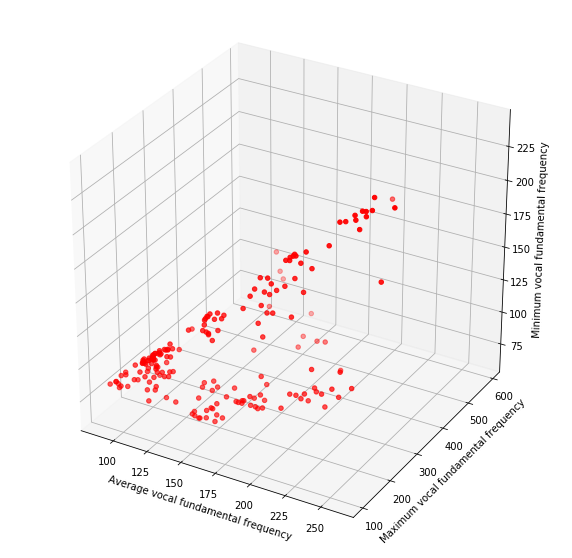

In [178]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

x = df_new['Fo(Hz)']
y = df_new['Fhi(Hz)']
z = df_new['Flo(Hz)']

ax.scatter(x,y,z, c='r', marker = 'o')

ax.set_xlabel('Average vocal fundamental frequency')
ax.set_ylabel('Maximum vocal fundamental frequency')
ax.set_zlabel('Minimum vocal fundamental frequency')

plt.show()


# Support Vector Machine


## Preprocessing and normalization

In [179]:
# Preprocessing
x_svm = df_new.drop(['status'], axis = 1)
y_svm = df_new['status']

In [180]:
# Normalization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_svm = ss.fit_transform(x_svm)

## Training  and testing datasets

In [181]:
# Split the dataset
x_train1,x_test1,y_train1,y_test1=train_test_split(x_svm, y_svm,test_size = 0.2,random_state=4 , stratify = y_svm)

In [182]:
from sklearn import svm
svm_model = svm.SVC(kernel = 'rbf')
svm_model.fit(x_train1,y_train1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [195]:
svm_model.support_vectors_

array([[-0.92, -0.22, -0.45, ..., -0.07, -0.07, -0.07],
       [ 1.81,  0.41,  2.47, ..., -0.07, -0.07, -0.07],
       [-0.64, -0.65,  0.13, ..., -0.07, -0.07, -0.07],
       ...,
       [-0.01, -0.34, -1.16, ..., -0.07, -0.07, -0.07],
       [-0.88, -0.76, -0.48, ..., -0.07, -0.07, -0.07],
       [ 0.1 ,  2.69, -1.02, ..., -0.07, -0.07, -0.07]])

In [64]:
import graphviz
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [183]:
y_svm_pred = svm_model.predict(x_test1)
y_svm_pred[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Evaluation

In [184]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [185]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.74      1.00      0.85        29

    accuracy                           0.74        39
   macro avg       0.37      0.50      0.43        39
weighted avg       0.55      0.74      0.63        39

Confusion matrix, without normalization
[[ 0 10]
 [ 0 29]]


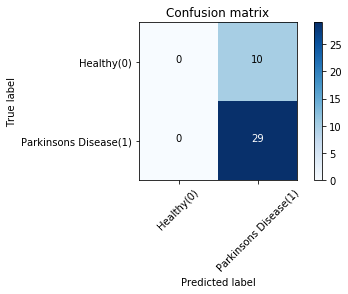

In [186]:
# Compute confusion matrix
svm_matrix = confusion_matrix(y_test1, y_svm_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test1, y_svm_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_matrix, classes=['Healthy(0)','Parkinsons Disease(1)'],normalize= False,  title='Confusion matrix')

In [187]:
# Calculate f1_score
from sklearn.metrics import f1_score
f1_score(y_test1, y_svm_pred, average='weighted') 

0.6342383107088989

In [188]:
# Calculate Jaccard similarity score
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test1, y_svm_pred)

0.7435897435897436

In [189]:
# Calculate accuracy of model
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train1, svm_model.predict(x_train1)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, y_svm_pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.7435897435897436


## Data visualization

In [191]:
X = df_new.drop(['status'],axis = 1)
Y = df_new['status']

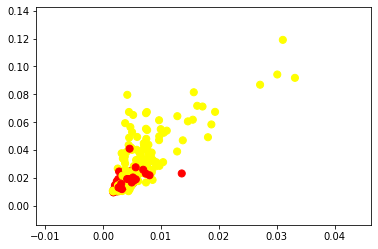

In [200]:
plt.scatter(X.iloc[:,3],X.iloc[:,8], c=Y, s=50, cmap='autumn')

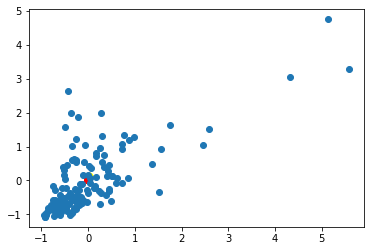

In [201]:
plt.scatter(X.iloc[:, 3], X.iloc[:, 8], c=Y, s=50, cmap='autumn')
plt.scatter(svm_model.support_vectors_[:,3],svm_model.support_vectors_[:,8])

# K-means clustering

## normalize the dataset

In [66]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [87]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,...,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-2.072416e-16,6.148928e-17,-2.127927e-17,2.562053e-18,-1.380662e-16,9.351494e-17,1.015569e-16,2.829645e-16,-1.369275e-16,8.255505e-17,...,-1.666758e-16,-1.695225e-16,-1.726539e-16,-1.757853e-16,-1.789167e-16,-1.820481e-16,-1.851795e-16,-1.882397e-16,-1.913000e-16,1.599860e-16
std,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,...,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00,1.002574e+00
min,-1.040581e+00,-1.171366e+00,-9.389487e-01,-1.064103e+00,-8.872543e-01,-9.180440e-01,-8.873331e-01,-1.072340e+00,-1.014787e+00,-1.097467e+00,...,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-3.905125e+00
25%,-6.820590e-01,-7.379376e-01,-5.708520e-01,-6.898141e-01,-5.561906e-01,-5.764609e-01,-5.557071e-01,-7.020291e-01,-6.881025e-01,-7.326044e-01,...,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,2.560738e-01
50%,-2.331437e-01,-2.766579e-01,-2.647942e-01,-4.018994e-01,-2.724216e-01,-2.748504e-01,-2.736279e-01,-3.583019e-01,-3.151160e-01,-2.838083e-01,...,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,2.560738e-01
75%,2.969710e-01,5.458200e-01,2.366858e-01,4.618447e-01,1.785683e-01,1.848331e-01,1.784870e-01,4.346898e-01,3.485429e-01,4.543106e-01,...,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,-7.179582e-02,2.560738e-01
max,4.327631e+00,2.829908e+00,5.570985e+00,6.220139e+00,6.125892e+00,5.862742e+00,6.126923e+00,4.751617e+00,5.246243e+00,4.029374e+00,...,1.392839e+01,1.392839e+01,1.392839e+01,1.392839e+01,1.392839e+01,1.392839e+01,1.392839e+01,1.392839e+01,1.392839e+01,2.560738e-01


## Finding best clusters

In [88]:
SSE_scaled = []

In [89]:
for cluster in range(1,20):
    k_means = KMeans(n_jobs = -1, n_clusters = cluster)
    k_means.fit(X_scaled)
    SSE_scaled.append(k_means.inertia_)

Text(0, 0.5, 'SSE')

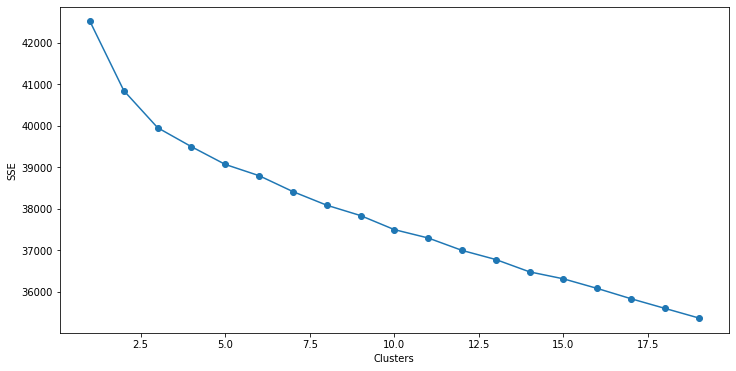

In [90]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

In [91]:
k_means = KMeans(n_jobs = -1, n_clusters = 5)
k_means.fit(X_scaled)
pred = k_means.predict(X_scaled)

In [92]:
pred

array([0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 4, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0,
       1, 3, 0, 3, 1, 4, 4, 4, 4, 3, 4, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 4, 4, 3, 1, 1, 1, 1, 4, 1])

In [93]:
frame = pd.DataFrame(X_scaled)
frame['cluster'] = pred

In [94]:
frame['cluster'].value_counts()

3    81
0    81
2    12
1    11
4    10
Name: cluster, dtype: int64

In [95]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,cluster
0,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,0.256074,0
1,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,0.256074,0
2,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,0.256074,0
3,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,0.256074,0
4,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,...,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,-0.071796,0.256074,2


In [96]:
k_means.inertia_

39145.31738435509

## Data visualization

In [136]:
df.head()

,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,Shimmer,Shimmer(dB),...,name_phon_R01_S49_4,name_phon_R01_S49_5,name_phon_R01_S49_6,name_phon_R01_S50_1,name_phon_R01_S50_2,name_phon_R01_S50_3,name_phon_R01_S50_4,name_phon_R01_S50_5,name_phon_R01_S50_6,Clusters
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0,0,0,0,0,0,0,0,0,1
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0,0,0,0,0,0,0,0,0,1
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0,0,0,0,0,0,0,0,0,1
10,88.333,112.240,84.072,0.00505,0.00006,0.00254,0.00330,0.00763,0.02143,0.197,...,0,0,0,0,0,0,0,0,0,1
12,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,0.01259,0.112,...,0,0,0,0,0,0,0,0,0,1


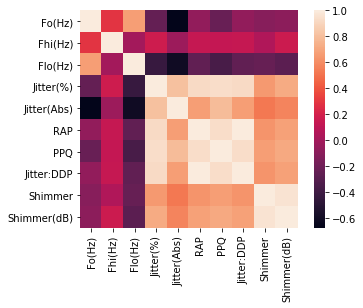

In [144]:
df1 = df[['Fo(Hz)', 'Fhi(Hz)', 'Flo(Hz)', 'Jitter(%)', 'Jitter(Abs)', 'RAP',
       'PPQ', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)']]

cor = df1.corr()
sns.heatmap(cor,square = True)

In [208]:
df_new.head()

,Fo(Hz),Fhi(Hz),Flo(Hz),Jitter(%),Jitter(Abs),RAP,PPQ,Jitter:DDP,Shimmer,Shimmer(dB),...,name_phon_R01_S49_3,name_phon_R01_S49_4,name_phon_R01_S49_5,name_phon_R01_S49_6,name_phon_R01_S50_1,name_phon_R01_S50_2,name_phon_R01_S50_3,name_phon_R01_S50_4,name_phon_R01_S50_5,name_phon_R01_S50_6
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0,0,0,0,0,0,0,0,0,0
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0,0,0,0,0,0,0,0,0,0
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0,0,0,0,0,0,0,0,0,0
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0,0,0,0,0,0,0,0,0,0
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0,0,0,0,0,0,0,0,0,0


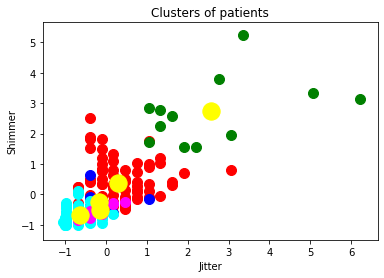

In [215]:
plt.scatter(X_scaled[pred==0, 3], X_scaled[pred==0, 8], s=100, c='red', label ='Cluster 1')
plt.scatter(X_scaled[pred==1, 3], X_scaled[pred==1, 8], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_scaled[pred==2, 3], X_scaled[pred==2, 8], s=100, c='green', label ='Cluster 3')
plt.scatter(X_scaled[pred==3, 3], X_scaled[pred==3, 8], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X_scaled[pred==4, 3], X_scaled[pred==4, 8], s=100, c='magenta', label ='Cluster 5')
plt.scatter(k_means.cluster_centers_[:, 3], k_means.cluster_centers_[:, 8], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of patients')
plt.xlabel('Jitter')
plt.ylabel('Shimmer')
plt.show()

# Decision tree classification

## Building a model and Evaluating accuracy of model

In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [48]:
speech_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
speech_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
speech_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
y_pred_tree = speech_tree.predict(x_test)
y_pred_tree[0:10]

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [51]:
y_pred_tree_train = speech_tree.predict(x_train)
y_pred_tree_train[0:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [52]:
from sklearn import metrics
print("DecisionTrees's Accuracy(Test set Accuracy): ", metrics.accuracy_score(y_test, y_pred_tree)*100)
print("Train set Accuracy:", metrics.accuracy_score(y_train, y_pred_tree_train)*100)

DecisionTrees's Accuracy(Test set Accuracy):  89.74358974358975
Train set Accuracy: 98.07692307692307


## Changing max depth

In [53]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    test_accuracy.append(dt_model.score(x_test, y_test))

In [54]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'test_acc':test_accuracy})
frame.head(10)

,max_depth,train_acc,test_acc
0,1,0.865385,0.871795
1,2,0.884615,0.820513
2,3,0.923077,0.820513
3,4,0.955128,0.846154
4,5,0.967949,0.846154
5,6,0.974359,0.846154
6,7,0.980769,0.846154
7,8,0.987179,0.846154
8,9,0.993590,0.846154


No handles with labels found to put in legend.


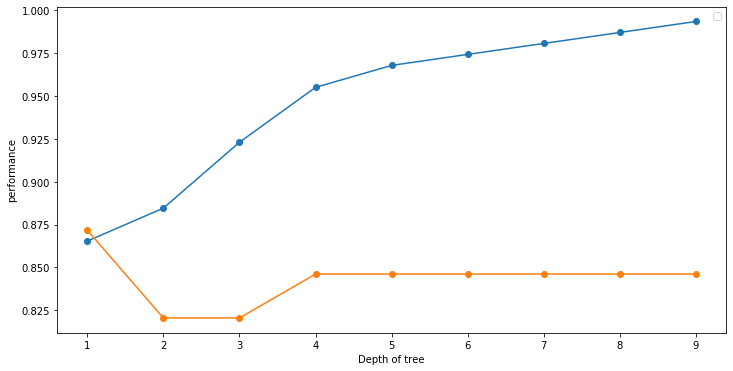

In [55]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [216]:
# Building the model again with max_depth = 8 and max_leaf_nodes = 25
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 8, max_leaf_nodes = 25)
dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [217]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [218]:
y_model_test = dt_model.predict(x_test)
y_model_test[0:10]

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [219]:
y_model_train = dt_model.predict(x_train)
y_model_train[0:10]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [220]:
from sklearn import metrics
print("DecisionTrees's Accuracy(Test set Accuracy): ", metrics.accuracy_score(y_test, y_model_test)*100)
print("Train set Accuracy:", metrics.accuracy_score(y_train, y_model_train)*100)

DecisionTrees's Accuracy(Test set Accuracy):  92.3076923076923
Train set Accuracy: 100.0


In [221]:
from sklearn.metrics import confusion_matrix
import itertools

In [222]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7  3]
 [ 0 29]]


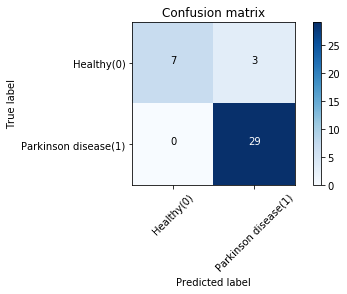

In [223]:
Decisiontree_matrix = confusion_matrix(y_test,y_model_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Decisiontree_matrix, classes=['Healthy(0)','Parkinson disease(1)'],normalize= False,  title='Confusion matrix')

## Data visualization

In [228]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [229]:
tree.export_graphviz(dt_model, out_file = 'tree.dot')
tree

<module 'sklearn.tree' from 'C:\\Users\\hp\\anaconda3\\lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [230]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

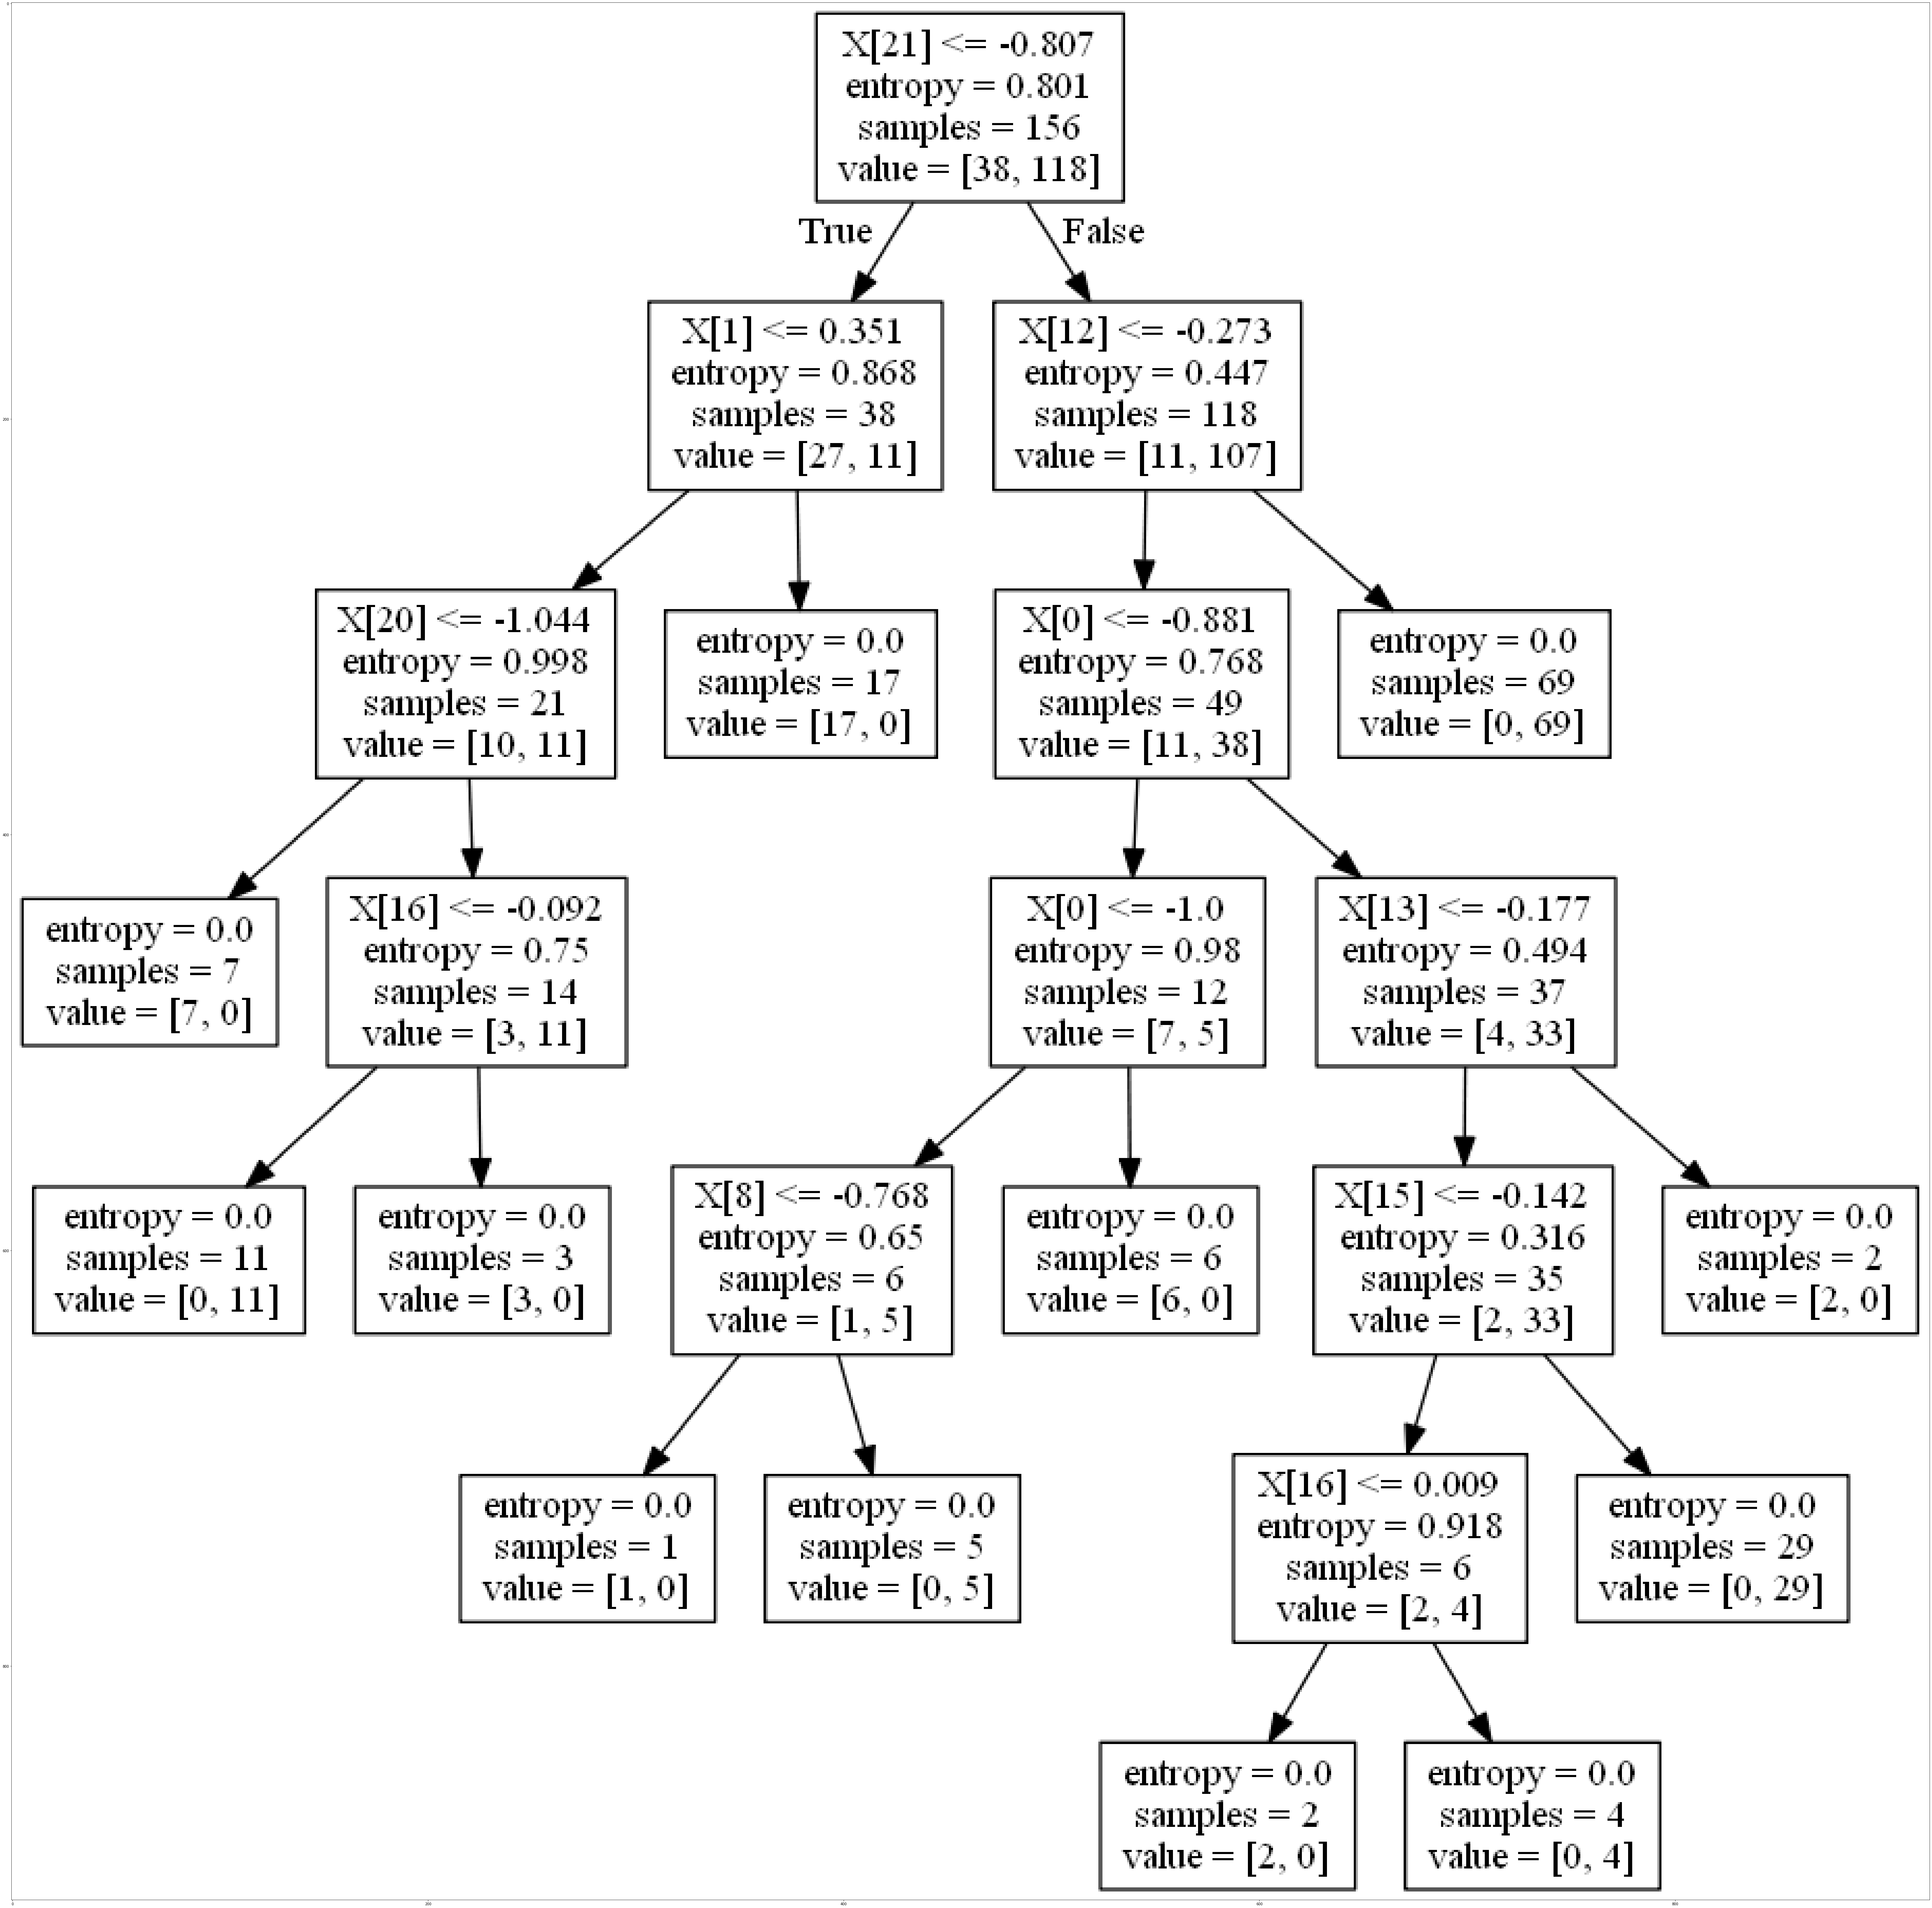

In [231]:
filename = "tree.png"
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')